## Imports

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Data


In [62]:
df = pd.read_csv("Advertising.csv")

In [63]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Multiple Features (N-Dimensional)

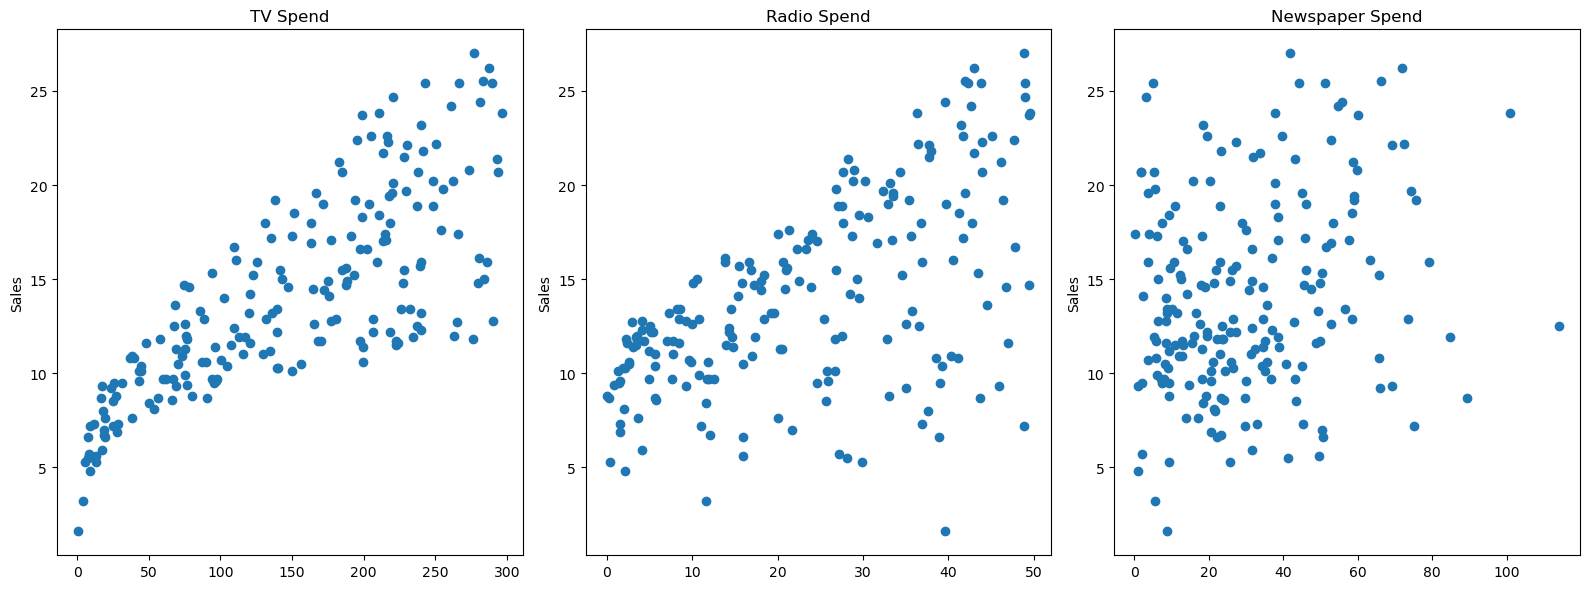

In [64]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();
plt.show()

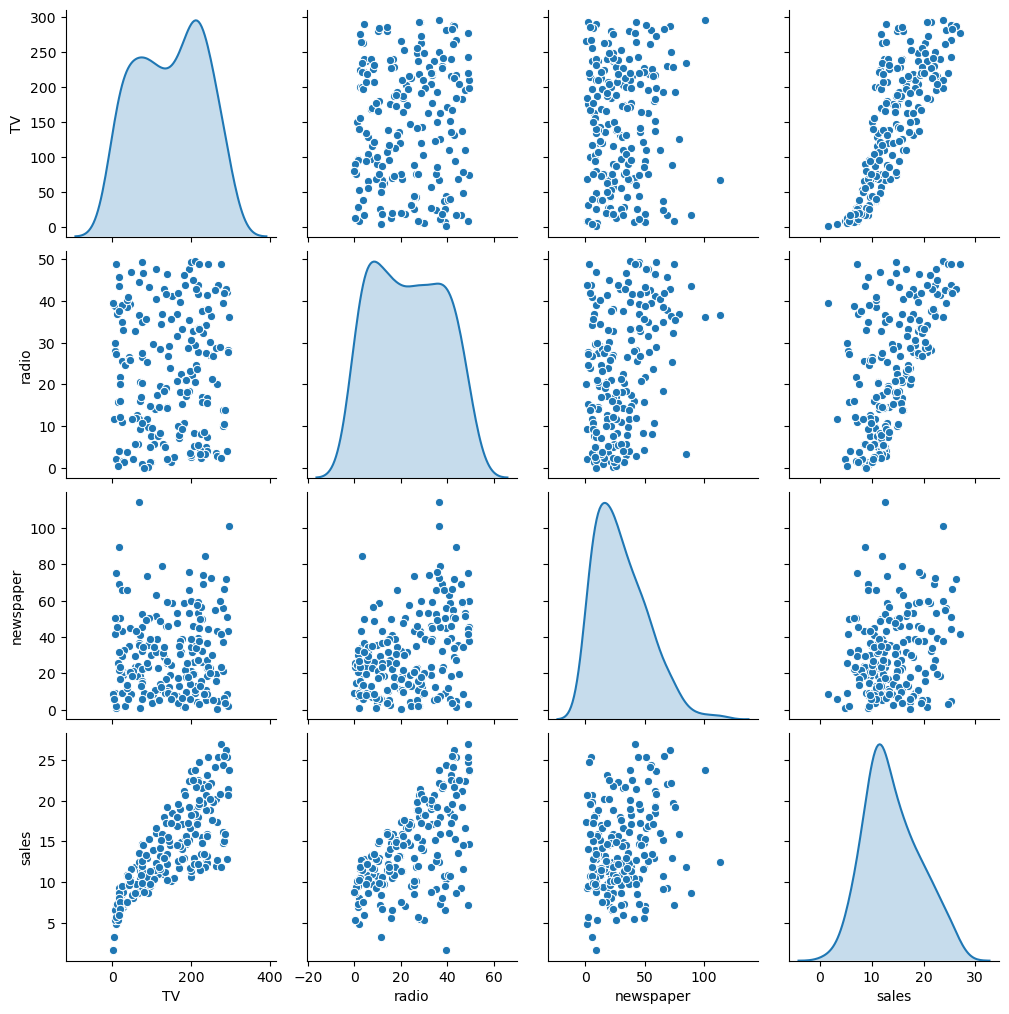

In [65]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')
plt.show()

In [66]:
X = df.drop('sales',axis=1)
y = df['sales']

## Train | Test Split


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [69]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [70]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [71]:
X_test

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


In [72]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

## Creating a Model (Estimator)

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [75]:
model = LinearRegression()

### Fit/Train the Model on the training data


In [76]:
model.fit(X_train,y_train)

LinearRegression()

### Evaluating Model

In [77]:
test_predictions = model.predict(X_test)

In [78]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [80]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [81]:
MAE

1.2137457736144808

In [82]:
MSE

2.298716697886378

In [83]:
RMSE

1.5161519375993877

In [84]:
df['sales'].mean()

14.022500000000003

### Plotting Residuals


In [85]:
# Predictions on training and testing sets
# Doing residuals separately will alert us to any issue with the split call
test_predictions = model.predict(X_test)

In [86]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_predictions

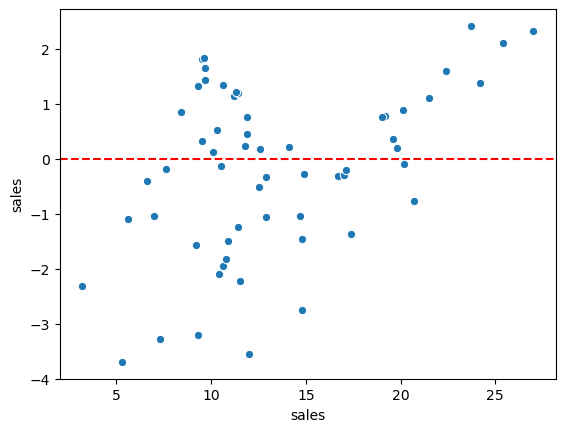

In [87]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

-----------

## Retraining Model on Full Data


In [88]:
final_model = LinearRegression()

In [89]:
final_model.fit(X,y)

LinearRegression()

### Final Model Fit

Note, we can only do this since we only have 3 features, for any more it becomes unreasonable.

In [90]:
y_hat = final_model.predict(X)

In [91]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

### Residuals

Should be normally distributed as discussed in the video.

In [92]:
residuals = y_hat - y

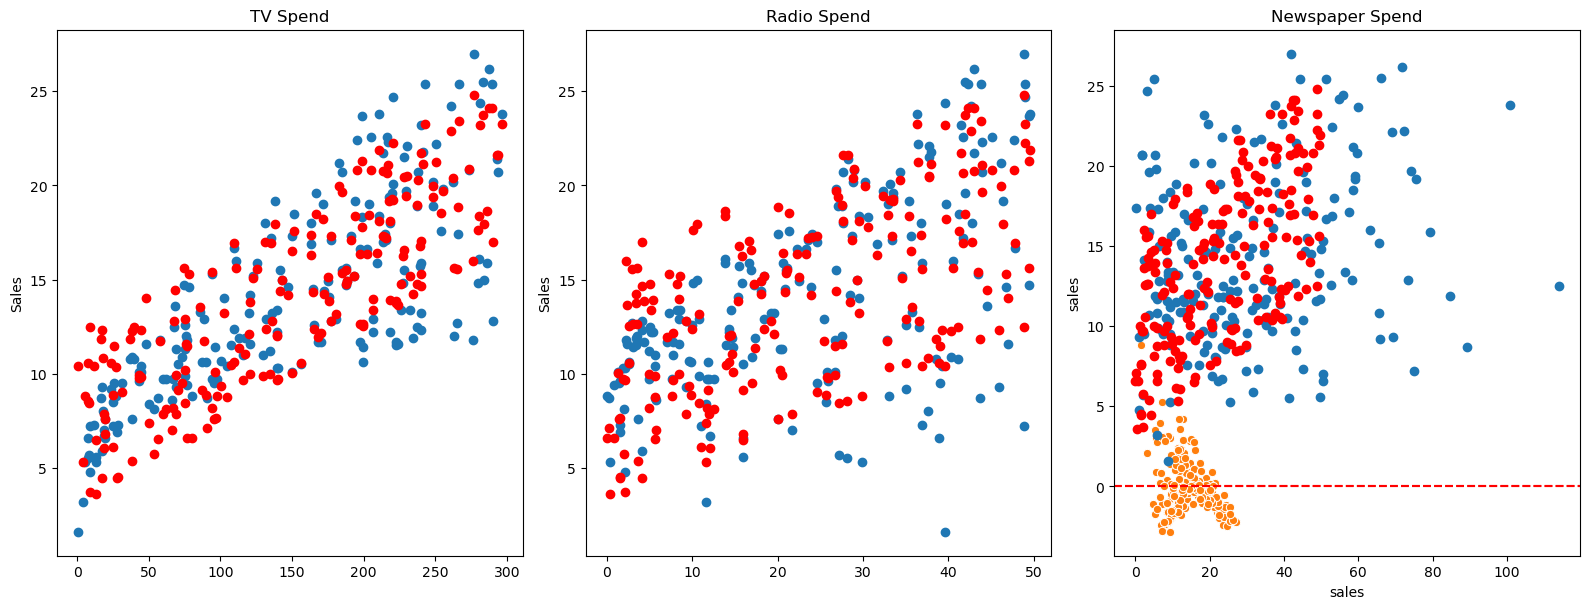

In [103]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Coefficients

In [94]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [95]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [96]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Prediction on New Data


In [97]:
campaign = [[149,22,12]]

In [98]:
final_model.predict(campaign)

C:\Users\sun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

-----

## Model Persistence

In [99]:
from joblib import dump, load

In [100]:
dump(final_model, 'sales_model.joblib') 

['sales_model.joblib']

In [101]:
loaded_model = load('sales_model.joblib')

In [102]:
loaded_model.predict(campaign)

C:\Users\sun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])